In this notebook we check the geometry and the confinment of the particles generated. 

In [41]:
%run 'init.ipynb'
%matplotlib inline

In [3]:
#few imports 
import pandas as pd
import numpy as np
from pandas import HDFStore
from pandas import read_hdf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import ROOT
import root_numpy
from matplotlib import colors
from matplotlib.colors import LogNorm
import matplotlib.patches as patches
import uproot
from matplotlib.patches import Rectangle

In [76]:
materials = [
    'Teflon_Pillar_',         #0
    "SS_OuterCryostat",       #1
    "SS_InnerCryostat",       #2
    "OuterCryostatReflector", #3 
    "SS_BellPlate",           #4
    "SS_BellSideWall",        #5
    "PmtTpc",                 #6
    "Copper_TopRing",         #7 
    "Copper_LowerRing",       #8
    "Copper_FieldGuard_",     #9
    "Copper_FieldShaperRing_" #10
    ]

material  = materials[10]

In [77]:
#oper with UpRoot --- check out the reiteration among files 

rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
print(rootfile)
def get_xyz(rootfile):
    file = uproot.open(rootfile)
    tree = file["events/events"]
    xp = tree["xp_pri"].array()
    df = tree.pandas.df([ "xp_pri", "yp_pri", "zp_pri"])
    df.columns = ['X', 'Y', 'Z_uc'] #rename 
    #Add some variables
    df['R'] = np.sqrt(df.X*df.Y+ df.Y*df.Y)
    df['R2'] = df.R*df.R
    offset = 1488/2
    df['Z'] = df.Z_uc+ offset 
    return df
data = get_xyz(rootfile)
data.head()

/userdata/arocchetti/XENONnT_2019-10-16/Copper_FieldShaperRing_/geantinos/output_Copper_FieldShaperRing__geantinos_1.root


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


,X,Y,Z_uc,R,R2,Z
entry,,,,,,
0,-598.603821,-297.171478,-1150.276001,515.944641,266198.875000,-406.276001
1,458.333496,485.215302,-716.794495,676.627136,457824.281250,27.205505
2,601.905457,-290.778992,-1464.179688,NaN,NaN,-720.179688
3,-582.338440,327.332153,-413.494965,NaN,NaN,330.505035
4,-455.029236,489.249359,-305.249207,129.391541,16742.169922,438.750793


In [19]:
##read the root file and get the branches you need 
# rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/Teflon_Pillar_/geantinos/output_Teflon_Pillar__geantinos_1.root'

# def get_position(rootfile):
#     f = ROOT.TFile(rootfile)
#     tree = f.Get('events/events')
#     out=root_numpy.tree2array(tree)
#     X = np.array([out['xp_pri'][i] for i in range(len(out['xp_pri']))])
#     Y = np.array([out['yp_pri'][i] for i in range(len(out['yp_pri']))])
#     Z_uc = np.array([out['zp_pri'][i] for i in range(len(out['zp_pri']))]) #z not centered
#     Etot = np.array(out['etot'])
#     f.Close()
#     X,Y, Z_uc, Etot = get_position(rootfile)
#     return  X,Y, Z_uc


In [22]:
#call the function and transform it into a dataframe ---SLOW----
#X,Y, Z_uc, Etot = get_position(rootfile)
#data = pd.DataFrame({'X': X, 'Y': Y, 'Z_uc': Z_uc, 'Etot': Etot})

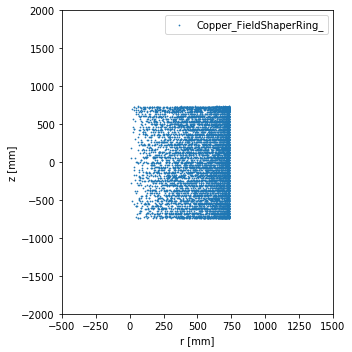

In [115]:
plt.figure(figsize=(5,5))

def print_volume(data):
    plt.hist2d(data.R, data.Z, bins = (300,300), range = ((0, 1000), (-1500, 1500)), 
    norm = LogNorm())
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.title(material)
    plt.tight_layout()
    plt.show()

    
def scatter(data):
    plt.scatter(data.R, data.Z, marker = '.', s=2,label=material )
    c=1
    plt.xlim(-500,1500)
    plt.ylim(-2000, 2000)
    plt.ylabel('z [mm]')
    plt.xlabel('r [mm]')
    plt.tight_layout()
    plt.legend()
    #plt.show()

scatter(data)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


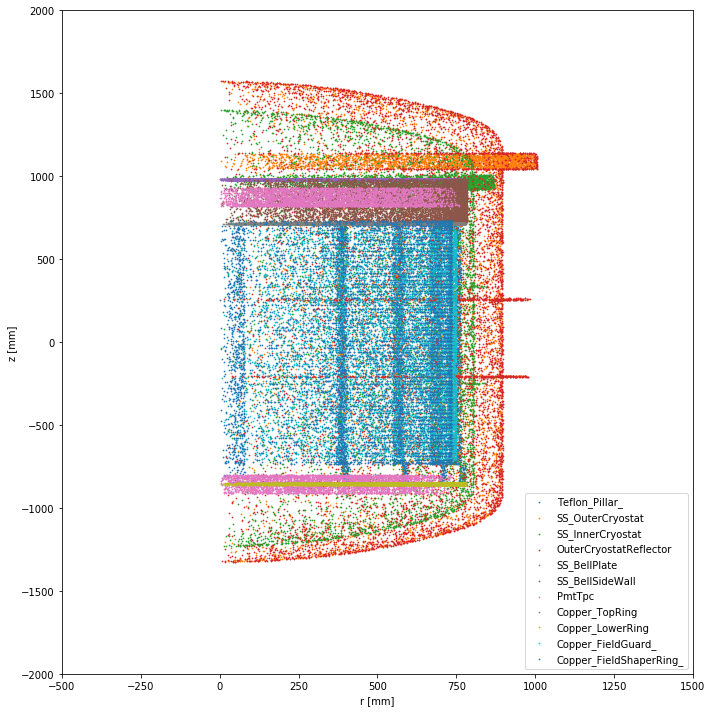

In [116]:
plt.figure(figsize=(10,10))
for material in materials:
    rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/'+ material + '/geantinos/output_'+ material+'_geantinos_1.root'
    data = get_xyz(rootfile)
    scatter(data)
    #plt.show()

In [ ]:





from matplotlib import colors
from matplotlib.colors import LogNorm
plt.figure(figsize=(10,10))
import matplotlib.patches as patches
from matplotlib.patches import Rectangle

m1 = -0.40431
m2 = 0.38274
data['q1'] = data.Z - m1* data.R 
data['q2'] = data.Z - m2* data.R
plt.hist2d(data.R, data.Z, bins = (300,300), range = ((0, 1000), (-1500, 1500)), 
           norm = LogNorm()
          )

plt.ylabel('z [mm]')
plt.xlabel('r [mm]')
plt.title("cryostats")
plt.clim(1,100)
plt.colorbar()

#rect = patches.Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')
currentAxis = plt.gca()
#STIFFENING RINGS INNERCRYO
currentAxis.add_patch(Rectangle((732, 125+offset), 70, 160,alpha=1, fill=None ))
currentAxis.add_patch(Rectangle((732, -500+offset), 70, 160,alpha=1, fill=None ))
currentAxis.add_patch(Rectangle((732, -1100+offset), 70, 160,alpha=1, fill=None ))
#STIFFENING RINGS OUTCYRO
currentAxis.add_patch(Rectangle((815, 300+offset), 100, 120,alpha=1, fill=None ))
currentAxis.add_patch(Rectangle((815, -420+offset), 100, 120,alpha=1, fill=None ))
currentAxis.add_patch(Rectangle((815, -1000+offset), 100, 120,alpha=1, fill=None ))



# points = ((1,1), (2,1), (2,2), (1,2), (0.5,1.5))
points = ((0,732), (800,500), (-2080,-1796), (0,732))
#draw.polygon((points), fill=200)

#:wqfv2= (pow(TMath::Abs((z_fv)/634.),3.0)+pow(TMath::Abs((r2)/401956.),3.0));

plt.plot([0,742],[800+offset,500+offset])
plt.plot([0,742],[-2080+offset,-1796+offset])
plt.plot([742,742],[500+offset,-1796+offset])


plt.show()

In [ ]:
print(800+offset)
df_in = pd.DataFrame()
#df_in = data[data['rp_pri'] < 730 ] 
df_in = data[data['q1'] <= 800+offset] 
df_in = df_in[df_in['q2'] > -2080+offset] 
df_in = df_in[df_in.rp_pri < 742]
#df_in = df_in[df_in['zp_pri'] < 700 ] 
#data['rp_incryo'] = data['rp_incryo'].dropna()
df_in.head(10)
plt.plot([0,742],[800+offset,500+offset])
plt.plot([0,742],[-2080+offset,-1796+offset])
plt.plot([742,742],[500+offset,-1796+offset])

plt.hist2d(df_in.rp_pri, df_in.z, bins = (300,300), range = ((0, 1000), (-1500, +1700)), 
           norm = LogNorm()
          )
plt.show()


In [ ]:
df_out = pd.DataFrame()
df_out2 = pd.DataFrame()
df_out1 = pd.DataFrame()
df_out1 = data[data['q1'] > 800+offset] 
df_out2 = data[data['q2'] < -2080+offset] 
df_out = pd.concat([df_out1, df_out2])
                    
df_out3 = data[data.rp_pri > 742] 
df_out4 = df_out3[df_out3.rp_pri < 750] 

df_out = pd.concat([df_out, df_out3, df_out4])

df_out.head(10)
plt.plot([0,742],[800+offset,500+offset])
plt.plot([0,742],[-2080+offset,-1796+offset])
plt.plot([742,742],[500+offset,-1796+offset])

plt.hist2d(df_out.rp_pri, df_out.z, bins = (300,300), range = ((0, 1000), (-1500, +1700)), 
           norm = LogNorm()
          )
plt.show()


In [ ]:
#fv2 = ((abs(data.z/634.))**3+abs(data.rp_pri/401956.)**3)
data['fv'] = ((abs(data.z/634.))**3+abs(data.rp_pri/401956.)**3) 

In [ ]:
def fiducialize(df):
    if df['fv']<1:
        df_fid = 
    

In [ ]:
rootfile = '/userdata/arocchetti/XENONnT_2019-10-16/Copper_TopRing/Co60/Copper_TopRing.root'

df = read_root(rootfile, 'events/events')
name2 = '/home/rocchetti/MonteCarlo-studies-/output/test_'
columns = ['xp_pri', 'yp_pri','zp_pri',
     
          ]

data = pd.DataFrame()
data = df[columns]
type(data)

data.to_hdf(name2, key='data', mode='a')
data.head(3)